# **Ініціалізація датасету**

In [1]:
# підключимо бібліотеку pandas для обробки даних (вона вже встановлена в Colab)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import datasets, linear_model
# зазначимо url звідки ми візьмемо дані
#датасет футболістів fifa 17
url = "http://www.sharecsv.com/dl/5522772d78e243bddf569c3905e645d7/dataset.csv"
# створимо pandas Dataframe з csv-файлу, який ми отримаємо по вищезазначеному url
# Dataframe надасть нам необхідні можливості для обробки даних
df = pd.read_csv(url)
# 5 перших записів
df.head()

Name Nationality          Club  Rating  Height_cm  Weight_kg  \
0  Cristiano Ronaldo    Portugal   Real Madrid      94        185         80   
1       Lionel Messi   Argentina  FC Barcelona      93        170         72   
2             Neymar      Brazil  FC Barcelona      92        174         68   
3        Luis Suarez     Uruguay  FC Barcelona      92        182         85   
4       Manuel Neuer     Germany     FC Bayern      92        193         92   

  Preffered_Foot  Age  Ball_Control  
0          Right   32            93  
1           Left   29            95  
2          Right   25            95  
3          Right   30            91  
4          Right   31            48

# **1 Графік**

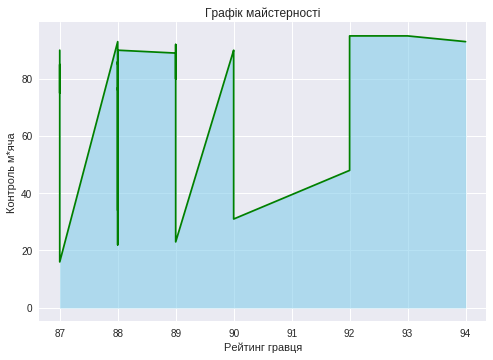

In [0]:
x = df['Rating'].values
y = df['Ball_Control'].values
plt.fill_between( x, y, color="skyblue", alpha=0.6)
plt.plot(x, y, color="green")

plt.xlabel("Рейтинг гравця")
plt.ylabel("Контроль м*яча")
plt.title("Графік майстерності")

plt.show()

# **2 Графік**

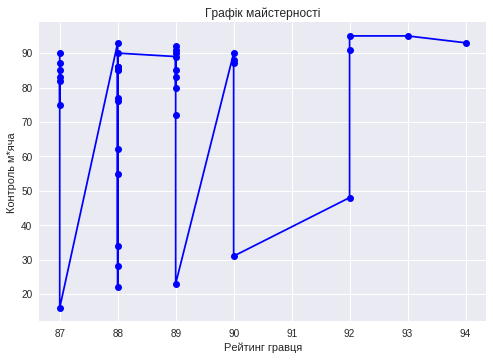

In [0]:
x = df['Rating'].values
y = df['Ball_Control'].values
plt.plot(x, y, color="blue", linestyle='-', marker='o')

plt.xlabel("Рейтинг гравця")
plt.ylabel("Контроль м*яча")
plt.title("Графік майстерності")

plt.show()

# **3 Графік**

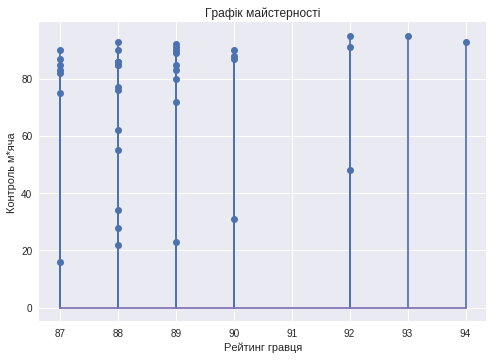

In [0]:
x = df['Rating'].values
y = df['Ball_Control'].values
plt.stem(x, y)
plt.plot()

plt.xlabel("Рейтинг гравця")
plt.ylabel("Контроль м*яча")
plt.title("Графік майстерності")
plt.show()

# **4 Графік**

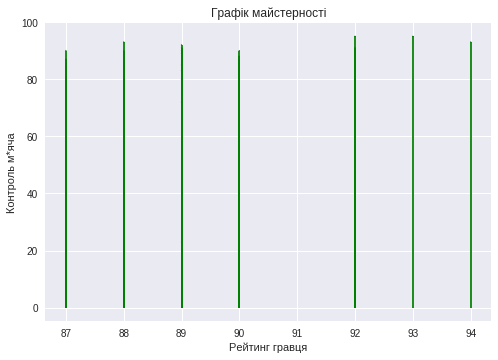

In [0]:
x =df['Rating'].values
y =df['Ball_Control'].values

my_color=np.where(y>=0, 'green', 'red')
 
plt.vlines(x=x, ymin=0, ymax=y, color=my_color)
plt.scatter(x, y, color=my_color,s=1, alpha=1)
plt.xlabel("Рейтинг гравця")
plt.ylabel("Контроль м*яча")
plt.title("Графік майстерності")
plt.show()

# **5 графік**

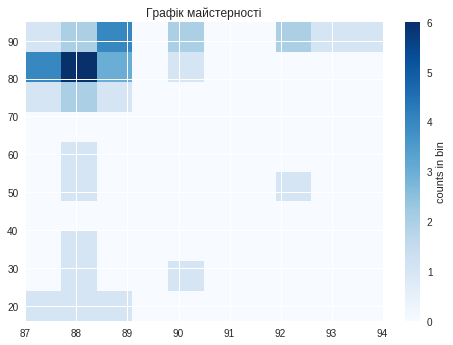

In [0]:
x = df["Rating"].values
y = df["Ball_Control"].values

plt.hist2d(x, y, bins=10, cmap='Blues')
plt.title("Графік майстерності")
cb = plt.colorbar()
cb.set_label('counts in bin')

# **6 графік**

Text(0.5,1,'Графік майстерності')

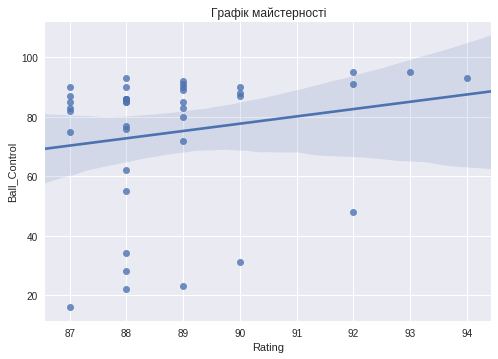

In [0]:
import seaborn as sns

sns.regplot(x=df["Rating"], y=df["Ball_Control"])
plt.title("Графік майстерності")

# **7 графік**

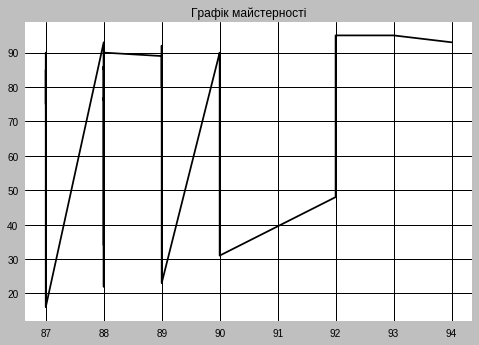

In [0]:
with plt.style.context('grayscale'):
    fig = plt.figure()
    ax = plt.axes()

    df_simple = df[0:100]
    df_simple

    x = df_simple["Ball_Control"].values
    y = df_simple["Rating"].values
    plt.title("Графік майстерності")

    ax.plot(y,x);

# **8 графік**

Text(0.5,1,'Графік майстерності')

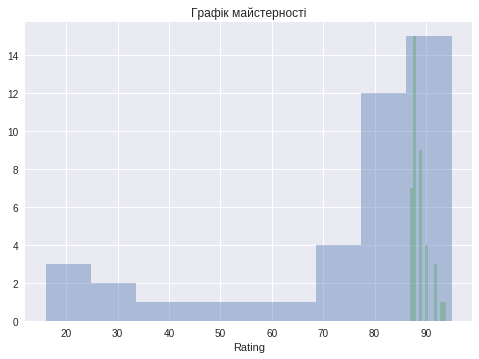

In [0]:
import seaborn as sns

df_simple = df

sns.distplot( a=df_simple["Ball_Control"], hist=True, kde=False, rug=False )
sns.distplot( a=df_simple["Rating"], hist=True, kde=False, rug=False )
plt.title("Графік майстерності")



# **9 графік**

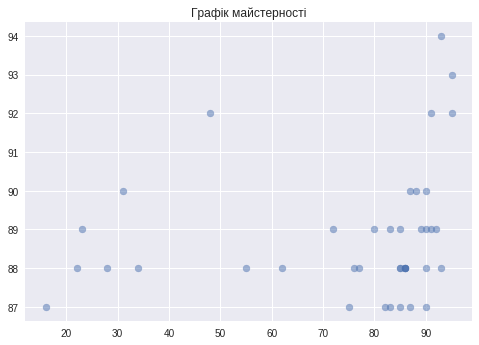

In [0]:
import matplotlib.pyplot as plt
import numpy as np
 
x = df["Ball_Control"].values
y = df["Rating"].values
 
plt.title("Графік майстерності")
plt.scatter(x, y, alpha=0.5)
plt.show()

# **10 графік**

Text(0.5,1,'Рейтинг')

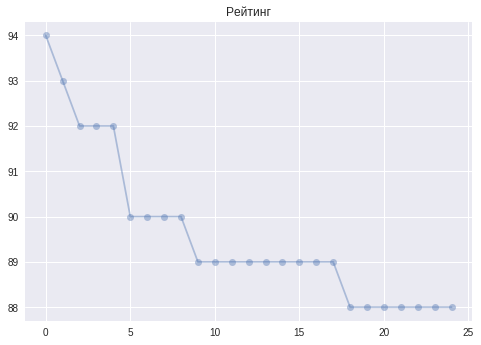

In [0]:
df_simple = df[0:25]
df_simple

x = df_simple["Rating"].values

plt.plot(x, marker='o', alpha=0.4)
plt.title("Рейтинг")

# **Контрольні запитання**

1. Ваші враження від такого феєричного ореолу засобів візуалізації в Python-екосистемі.

Дуже корисна річ, можна багато чого візуалізувати, подібним користуюсь вперше, враження чудові))

Чим, на вашу думку, ще можна підсилити свої можливості по візуалізації, привнісши інструменти, що знаходяться ПОЗА межею Python-екосистеми? (конкретика)

Немає припущень)

# Лаборатона робота №4

## Обчислення коефіцієнта кореляції Пірсона та p-рівня значимості

In [3]:
pearson_coef, p_value = stats.pearsonr(df['Rating'],df['Ball_Control'])
print("Коєфіцієнт кореляції Пірсона: ", pearson_coef) 
print("Р-значення = %.20f" % p_value)
print("\n*******************************************************************\n")
if p_value <= 0.05: 
  print("Оскільки Р-значення <= 0.05, то можемо стверджувати,\nщо кореляція мiж рейтингом гравця "+
        "\nта  контролем мяча != 0")
else:
  print("Оскільки Р-значення > 0.05, то можемо стверджувати,\nщо кореляція мiж рейтингом гравця "+
        "\nта контролем мяча = 0")
print("\n*******************************************************************\n")

Коєфіцієнт кореляції Пірсона:  0.18080644973140436
Р-значення = 0.26421165828297155098

*******************************************************************

Оскільки Р-значення > 0.05, то можемо стверджувати,
що кореляція мiж рейтингом гравця 
та контролем мяча = 0

*******************************************************************



## Регресія

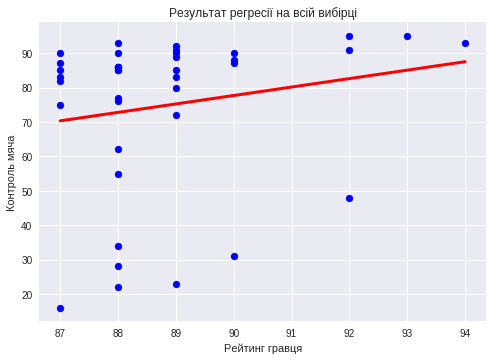

In [4]:
df['Rating'].fillna(0, inplace=True)
df['Ball_Control'].fillna(0, inplace=True)
X = df['Rating'].values
Y = df['Ball_Control'].values
X = X.reshape(df['Rating'].shape[0], 1)
Y = Y.reshape(df['Ball_Control'].shape[0], 1)


X_train = X[:-10]
X_test = X[-10:]


Y_train = Y[:-10]
Y_test = Y[-10:]

regr = linear_model.LinearRegression()
regr.fit(X, Y)

plt.title('Результат регресії на всій вибірці')
plt.xlabel('Рейтинг гравця')
plt.ylabel('Контроль мяча')

plt.scatter(X, Y,  color='blue')
plt.plot(X, regr.predict(X), color='red', linewidth=3)

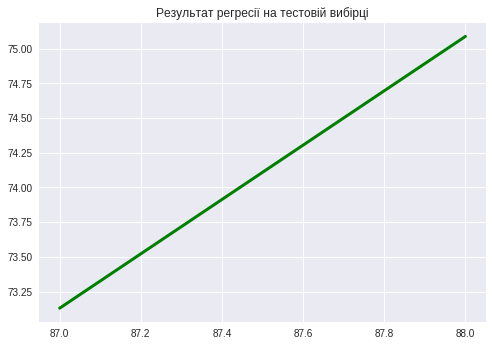

In [5]:
regr = linear_model.LinearRegression()
 

regr.fit(X_train, Y_train)

plt.title('Результат регресії на тестовій вибірці')
plt.plot(X_test, regr.predict(X_test), color='green',linewidth=3)

## Контрольні запитання

**1. Опишіть заради якої мети використовують кореляцію та регресію. Які сильні сторони цих інструментів? Які "підводні камені"?**

Кореляцію - для того, щоб дізнатися чи є яась залежність між різницею забитих та пропущених голів і місцем команди в турнірній таблиці. Однак, кореляція дуже чутлива до значень, які зустрічаються дуже рідко, але дуже відрізняються від інших у вибірці і по можить суттєво вплинути на значення коєфіціяєнта кореляції ПІрсона.

Регресію використовував для того, щоб побачити як кількість забитих голів команди впливає на кількість перемог. Регресія будується на основі "методу найменших кватдратів",що дозваляє найбільш адекватно її відобразити, тому регресія не є чутливою до критичних крайніх значень.